In [1]:
from pathlib import Path

affectnet_occluded_path = Path(r'/home/thor/Desktop/datasets/affectnet/affectnet7-occluded-for-balanced-sampling')
affectnet_training_set_path = affectnet_occluded_path / 'training_set'
affectnet_training_set_path_neutral = affectnet_training_set_path / '0'
affectnet_training_set_path_happy = affectnet_training_set_path / '1'
affectnet_training_set_path_sad = affectnet_training_set_path / '2'
affectnet_training_set_path_surprise = affectnet_training_set_path / '3'
affectnet_training_set_path_fear = affectnet_training_set_path / '4'
affectnet_training_set_path_disgust = affectnet_training_set_path / '5'
affectnet_training_set_path_anger = affectnet_training_set_path / '6'

affectnet_validation_set_path = affectnet_occluded_path / 'validation_set'
affectnet_test_set_path = affectnet_occluded_path / 'test_set'

emojihero_path = Path(r'/home/thor/Desktop/datasets/emoji-hero')
emojihero_training_set_path = emojihero_path / 'training_set'
emojihero_validation_set_path = emojihero_path / 'validation_set'
emojihero_test_set_path = emojihero_path / 'test_set'

id_to_emotion = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Fear',
    5: 'Disgust',
    6: 'Anger',
}


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
SEED = 42

In [3]:
def compute_class_frequencies(dataset_path: Path) -> dict:
    class_frequencies = {}
    for class_dir in sorted(dataset_path.iterdir()):
        num_files = sum(1 for _ in class_dir.iterdir())
        class_id = int(class_dir.name)
        class_frequencies[class_id] = num_files
        print(f'{class_id} - {id_to_emotion[class_id]:<9} : {num_files:>8} images')

    return class_frequencies


In [4]:
import keras

print('---EMOJI-HERO---')
print('---TRAINING SET---')
emojihero_training_set = keras.preprocessing.image_dataset_from_directory(emojihero_training_set_path,
                                                                          batch_size=BATCH_SIZE,
                                                                          image_size=IMAGE_SIZE,
                                                                          shuffle=True,
                                                                          seed=SEED)

class_frequencies = compute_class_frequencies(emojihero_training_set_path)

print('---VALIDATION SET---')
emojihero_validation_set = keras.preprocessing.image_dataset_from_directory(emojihero_validation_set_path,
                                                                            batch_size=BATCH_SIZE,
                                                                            image_size=IMAGE_SIZE,
                                                                            shuffle=True,
                                                                            seed=SEED)

compute_class_frequencies(emojihero_validation_set_path)

2024-03-21 09:19:52.150500: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-21 09:19:52.174699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 09:19:52.174718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 09:19:52.175244: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 09:19:52.178669: I tensorflow/core/platform/cpu_feature_guar

---EMOJI-HERO---
---TRAINING SET---
Found 2030 files belonging to 7 classes.


2024-03-21 09:19:53.033355: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 09:19:53.052484: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 09:19:53.052611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

0 - Neutral   :      414 images
1 - Happy     :      400 images
2 - Sad       :      274 images
3 - Surprise  :      360 images
4 - Fear      :      220 images
5 - Disgust   :      212 images
6 - Anger     :      150 images
---VALIDATION SET---
Found 770 files belonging to 7 classes.
0 - Neutral   :      110 images
1 - Happy     :      110 images
2 - Sad       :      110 images
3 - Surprise  :      110 images
4 - Fear      :      110 images
5 - Disgust   :      110 images
6 - Anger     :      110 images


{0: 110, 1: 110, 2: 110, 3: 110, 4: 110, 5: 110, 6: 110}

In [5]:
total_num_samples = sum(class_frequencies.values())
inverse_class_frequencies = {class_id: 1 / (frequency / total_num_samples) for class_id, frequency in
                             class_frequencies.items()}

total_inverse_class_frequencies = sum(inverse_class_frequencies.values())
class_weights = {class_id: freq / total_inverse_class_frequencies for class_id, freq in
                 inverse_class_frequencies.items()}

print(class_weights)

{0: 0.08856927366991273, 1: 0.09166919824835967, 2: 0.13382364707789735, 3: 0.10185466472039963, 4: 0.1666712695424721, 5: 0.1729607514119994, 6: 0.2444511953289591}


In [6]:
from tensorflow.data import Dataset

print('---AFFECTNET-occl---')

neutral_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_neutral,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMAGE_SIZE,
                                                               shuffle=True,
                                                               seed=SEED)
happy_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_happy,
                                                             batch_size=BATCH_SIZE,
                                                             image_size=IMAGE_SIZE,
                                                             shuffle=True,
                                                             seed=SEED)
sad_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_sad,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           shuffle=True,
                                                           seed=SEED)
surprise_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_surprise,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMAGE_SIZE,
                                                                shuffle=True,
                                                                seed=SEED)
fear_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_fear,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            shuffle=True,
                                                            seed=SEED)
disgust_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_disgust,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMAGE_SIZE,
                                                               shuffle=True,
                                                               seed=SEED)
anger_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_anger,
                                                             batch_size=BATCH_SIZE,
                                                             image_size=IMAGE_SIZE,
                                                             shuffle=True,
                                                             seed=SEED)

sampling_weights = [num_samples / total_num_samples for class_id, num_samples in class_frequencies.items()]
print(sampling_weights)

balanced_affectnet_training_set = Dataset.sample_from_datasets(
    [neutral_set, happy_set, sad_set, surprise_set, fear_set, disgust_set, anger_set],
    weights=sampling_weights,
    seed=SEED,
    stop_on_empty_dataset=True,
    rerandomize_each_iteration=True).repeat()

---AFFECTNET-occl---
Found 74494 files belonging to 7 classes.
Found 134035 files belonging to 7 classes.
Found 25079 files belonging to 7 classes.
Found 13710 files belonging to 7 classes.
Found 5998 files belonging to 7 classes.
Found 3423 files belonging to 7 classes.
Found 24502 files belonging to 7 classes.
[0.20394088669950738, 0.19704433497536947, 0.13497536945812807, 0.17733990147783252, 0.10837438423645321, 0.10443349753694581, 0.07389162561576355]


In [7]:
from tensorflow.data import Dataset

dataset_weights = [0.5, 0.5]
combined_training_set = Dataset.sample_from_datasets(
    [balanced_affectnet_training_set, emojihero_training_set],
    weights=dataset_weights,
    seed=SEED,
    stop_on_empty_dataset=True,
    rerandomize_each_iteration=True).repeat()

In [8]:
# print('---AFFECTNET-occl---')
# print('---VALIDATION SET---')
# affectnet_validation_set = keras.preprocessing.image_dataset_from_directory(affectnet_validation_set_path,
#                                                                             batch_size=BATCH_SIZE,
#                                                                             image_size=IMAGE_SIZE,
#                                                                             shuffle=True,
#                                                                             seed=SEED)
# 
# compute_class_frequencies(affectnet_validation_set_path)


In [9]:
# combined_validation_set = Dataset.sample_from_datasets([affectnet_validation_set, emojihero_validation_set])

In [10]:
from keras import layers
from keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip(mode="horizontal"),
    layers.RandomTranslation(height_factor=0.05, width_factor=0.05, fill_mode="constant"),
    layers.RandomRotation(0.1, fill_mode="constant"),
    layers.RandomZoom(0.1, fill_mode="constant"),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.1)
])

inputs = layers.Input(shape=(*IMAGE_SIZE, 3))
x = data_augmentation(inputs)


In [11]:
from keras.src.applications import EfficientNetB0


def build_model(num_classes, inputs_layer):
    model = EfficientNetB0(include_top=False, input_tensor=inputs_layer, weights="imagenet")

    # Freeze the pretrained weights
    # model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.Dropout(0.2, name="top_dropout1")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="EfficientNet")
    return model


model = build_model(len(class_frequencies), x)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['sequential[0][0]']          
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                   

In [12]:
# from tensorflow.keras.models import load_model
# 
# model = load_model(r'/home/thor/Desktop/repos/emoji-hero-baseline/affectnet_transfer_imagenet_checkpoints_20240310-2241/best_model_phase_4.keras')
# 
# for layer in model.layers[:-167]:
#     layer.trainable = False
# 
# model.summary()

In [13]:
# num_layers = len(model.layers)
# for i, layer in enumerate(model.layers):
#     print((num_layers - i), layer.name, layer.__class__.__name__)

In [14]:
# def unfreeze_model(model, num_layers):
#     for layer in model.layers[-num_layers:]:
#         if not isinstance(layer, layers.BatchNormalization):
#             layer.trainable = True

In [15]:
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M")
checkpoint_dir = Path(f"affectnet_occluded_and_emojihero_transfer_imagenet_checkpoints_{timestamp}")
training_histories = []
epoch_counter = 0
start_phase = 0
epochs_per_phase = [16, 12, 12]
learning_rate_per_phase = [1e-3, 1e-4, 1e-5]

steps_per_epoch = (total_num_samples + total_num_samples * (
        dataset_weights[0] / dataset_weights[1])) // BATCH_SIZE

for phase in range(start_phase, len(epochs_per_phase)):
    epochs = epochs_per_phase[phase]
    learning_rate = learning_rate_per_phase[phase]

    print(f'\n---STARTING TRAINING PHASE {phase}')
    print(f'EPOCHS:{epochs} LEARNING_RATE:{learning_rate}')
    checkpoint_filepath = str(checkpoint_dir / f'best_model_phase_{phase}.keras')

    model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=False,
                                                monitor='val_accuracy',
                                                mode='max',
                                                save_best_only=True)

    old_checkpoint_filepath = checkpoint_filepath.replace(f'phase_{phase}', f'phase_{phase - 1}')
    if Path(old_checkpoint_filepath).exists():
        print(f'Loading model from {old_checkpoint_filepath}')
        model = load_model(old_checkpoint_filepath)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    hist = model.fit(combined_training_set,
                     epochs=epoch_counter + epochs,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=emojihero_validation_set,
                     class_weight=class_weights,
                     callbacks=[model_checkpoint_callback],
                     initial_epoch=epoch_counter)

    epoch_counter += epochs
    training_histories.append(hist)


---STARTING TRAINING PHASE 0
EPOCHS:16 LEARNING_RATE:0.001
Epoch 1/16


2024-03-21 09:20:08.173525: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNet/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-03-21 09:20:09.698935: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-21 09:20:09.740070: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-21 09:20:10.263779: I external/local_xla/xla/service/service.cc:168] XLA service 0x76d8c995ecb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-21 09:20:10.263795: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-03-21 09:20:10.266850: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash

126/126 [==============================] - 37s 129ms/step - loss: 0.2268 - accuracy: 0.2884 - val_loss: 1.4748 - val_accuracy: 0.4481
Epoch 2/16
126/126 [==============================] - 14s 110ms/step - loss: 0.2085 - accuracy: 0.3814 - val_loss: 1.3443 - val_accuracy: 0.5571
Epoch 3/16
126/126 [==============================] - 15s 118ms/step - loss: 0.2028 - accuracy: 0.3777 - val_loss: 1.2543 - val_accuracy: 0.5727
Epoch 4/16
126/126 [==============================] - 14s 109ms/step - loss: 0.1943 - accuracy: 0.3854 - val_loss: 1.4603 - val_accuracy: 0.5792
Epoch 5/16
126/126 [==============================] - 14s 107ms/step - loss: 0.1632 - accuracy: 0.4621 - val_loss: 1.2350 - val_accuracy: 0.6273
Epoch 6/16
126/126 [==============================] - 14s 113ms/step - loss: 0.1640 - accuracy: 0.5144 - val_loss: 1.0331 - val_accuracy: 0.6260
Epoch 7/16
126/126 [==============================] - 14s 108ms/step - loss: 0.1661 - accuracy: 0.4998 - val_loss: 1.0465 - val_accuracy: 0.6

2024-03-21 09:24:15.763932: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNet/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


126/126 [==============================] - 31s 109ms/step - loss: 0.1130 - accuracy: 0.7068 - val_loss: 0.8341 - val_accuracy: 0.6857
Epoch 18/28
126/126 [==============================] - 13s 101ms/step - loss: 0.1066 - accuracy: 0.7397 - val_loss: 0.8250 - val_accuracy: 0.7013
Epoch 19/28
126/126 [==============================] - 13s 102ms/step - loss: 0.0859 - accuracy: 0.7760 - val_loss: 0.7846 - val_accuracy: 0.7234
Epoch 20/28
126/126 [==============================] - 14s 108ms/step - loss: 0.0878 - accuracy: 0.7337 - val_loss: 0.8226 - val_accuracy: 0.7156
Epoch 21/28
126/126 [==============================] - 12s 97ms/step - loss: 0.0891 - accuracy: 0.7743 - val_loss: 0.8146 - val_accuracy: 0.6870
Epoch 22/28
126/126 [==============================] - 12s 97ms/step - loss: 0.0711 - accuracy: 0.8543 - val_loss: 0.7586 - val_accuracy: 0.7091
Epoch 23/28
126/126 [==============================] - 12s 97ms/step - loss: 0.0682 - accuracy: 0.8279 - val_loss: 0.8444 - val_accuracy: 

2024-03-21 09:27:15.815971: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNet/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


126/126 [==============================] - 31s 106ms/step - loss: 0.0835 - accuracy: 0.7930 - val_loss: 0.7770 - val_accuracy: 0.7273
Epoch 30/40
126/126 [==============================] - 12s 97ms/step - loss: 0.0770 - accuracy: 0.8022 - val_loss: 0.7912 - val_accuracy: 0.7156
Epoch 31/40
126/126 [==============================] - 12s 97ms/step - loss: 0.0853 - accuracy: 0.8002 - val_loss: 0.7911 - val_accuracy: 0.7117
Epoch 32/40
126/126 [==============================] - 13s 101ms/step - loss: 0.0853 - accuracy: 0.8134 - val_loss: 0.7881 - val_accuracy: 0.7156
Epoch 33/40
126/126 [==============================] - 12s 96ms/step - loss: 0.0853 - accuracy: 0.7775 - val_loss: 0.8035 - val_accuracy: 0.7078
Epoch 34/40
126/126 [==============================] - 12s 99ms/step - loss: 0.0725 - accuracy: 0.8236 - val_loss: 0.7947 - val_accuracy: 0.7169
Epoch 35/40
126/126 [==============================] - 12s 97ms/step - loss: 0.0810 - accuracy: 0.7673 - val_loss: 0.8058 - val_accuracy: 0.

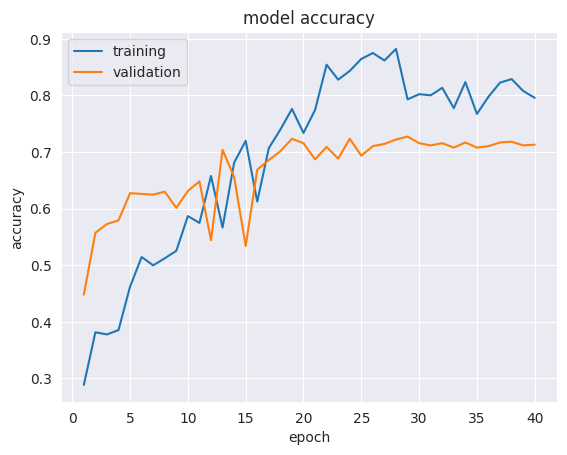

In [16]:
import matplotlib.pyplot as plt


def plot_and_save_combined_history(hists, checkpoint_dir):
    acc = []
    val_acc = []

    for hist in hists:
        acc += hist.history["accuracy"]
        val_acc += hist.history["val_accuracy"]

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, label="training")
    plt.plot(epochs, val_acc, label="validation")
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(loc="upper left")

    plt.savefig(str(checkpoint_dir / 'training_history.png'))

    plt.show()


plot_and_save_combined_history(training_histories, checkpoint_dir)

In [17]:
import csv


def save_training_history_csv(hists, checkpoint_dir):
    acc = []
    val_acc = []
    for hist in hists:
        acc.extend(hist.history["accuracy"])
        val_acc.extend(hist.history["val_accuracy"])

    epochs = range(1, len(acc) + 1)

    # CSV-Datei schreiben
    with (checkpoint_dir / 'training_history.csv').open(mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['epoch', 'accuracy', 'val_accuracy'])
        for epoch, accuracy, val_accuracy in zip(epochs, acc, val_acc):
            writer.writerow([epoch, accuracy, val_accuracy])


save_training_history_csv(training_histories, checkpoint_dir)

In [18]:
best_checkpoint = str(checkpoint_dir / "best_model_phase_2.keras")
model = load_model(best_checkpoint)

In [19]:
print('\n---AFFECTNET---')
print('---TEST SET---')
affectnet_test_set = keras.preprocessing.image_dataset_from_directory(affectnet_test_set_path,
                                                                      batch_size=BATCH_SIZE,
                                                                      image_size=IMAGE_SIZE,
                                                                      shuffle=False)
compute_class_frequencies(affectnet_test_set_path)



---AFFECTNET---
---TEST SET---
Found 3500 files belonging to 7 classes.
0 - Neutral   :      500 images
1 - Happy     :      500 images
2 - Sad       :      500 images
3 - Surprise  :      500 images
4 - Fear      :      500 images
5 - Disgust   :      500 images
6 - Anger     :      500 images


{0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500}

In [20]:
affectnet_test_loss, affectnet_test_acc = model.evaluate(affectnet_test_set)
print(f"Test accuracy: {affectnet_test_acc}")

110/110 [==============================] - 4s 26ms/step - loss: 1.9909 - accuracy: 0.2057
Test accuracy: 0.20571428537368774


In [21]:
print('\n---EMOJIHERO---')
print('---TEST SET---')
emojihero_test_set = keras.preprocessing.image_dataset_from_directory(emojihero_test_set_path,
                                                                      batch_size=BATCH_SIZE,
                                                                      image_size=IMAGE_SIZE,
                                                                      shuffle=False)
compute_class_frequencies(emojihero_test_set_path)


---EMOJIHERO---
---TEST SET---
Found 756 files belonging to 7 classes.
0 - Neutral   :      108 images
1 - Happy     :      108 images
2 - Sad       :      108 images
3 - Surprise  :      108 images
4 - Fear      :      108 images
5 - Disgust   :      108 images
6 - Anger     :      108 images


{0: 108, 1: 108, 2: 108, 3: 108, 4: 108, 5: 108, 6: 108}

In [22]:
emojihero_test_loss, emojihero_test_acc = model.evaluate(emojihero_test_set)
print(f"Test accuracy: {emojihero_test_acc}")

24/24 [==============================] - 1s 25ms/step - loss: 0.8752 - accuracy: 0.7011
Test accuracy: 0.7010582089424133


In [23]:
import numpy as np
from sklearn.metrics import classification_report

affectnet_y_pred_vectors = model.predict(affectnet_test_set)
affectnet_y_pred = np.argmax(affectnet_y_pred_vectors, axis=1)
affectnet_y_true = np.concatenate([y for _, y in affectnet_test_set], axis=0)

affectnet_report = classification_report(affectnet_y_true, affectnet_y_pred, target_names=id_to_emotion.values(),
                                         digits=4)
print(affectnet_report)

110/110 [==============================] - 4s 23ms/step
              precision    recall  f1-score   support

     Neutral     0.2878    0.1980    0.2346       500
       Happy     0.5126    0.3660    0.4271       500
         Sad     0.1319    0.0240    0.0406       500
    Surprise     0.3750    0.0600    0.1034       500
        Fear     0.2755    0.0540    0.0903       500
     Disgust     0.1445    0.6120    0.2338       500
       Anger     0.1529    0.1260    0.1382       500

    accuracy                         0.2057      3500
   macro avg     0.2686    0.2057    0.1811      3500
weighted avg     0.2686    0.2057    0.1811      3500


[[ 99  21  10   3   3 310  54]
 [ 18 183  23   2   2 179  93]
 [ 62  28  12   9  12 318  59]
 [ 37  32  10  30  26 326  39]
 [ 28  22  14  11  27 358  40]
 [ 33  50  13  14  20 306  64]
 [ 67  21   9  11   8 321  63]]


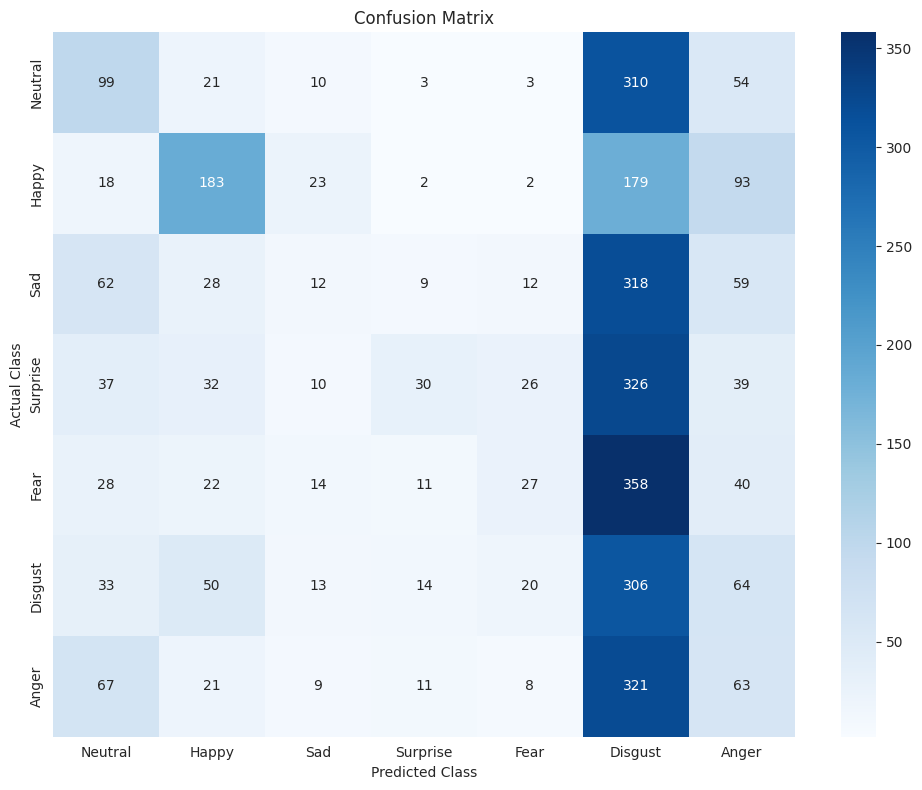

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred):
    class_names = id_to_emotion.values()

    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.tight_layout()
    plt.show()

    return fig


affectnet_cm_figure = plot_confusion_matrix(affectnet_y_true, affectnet_y_pred)


In [25]:
def save_evaluation_results(report, cm_figure, checkpoint_dir, dataset_name):
    with (checkpoint_dir / f'{dataset_name}_classification_report.txt').open(mode='w') as f:
        f.write(report)
    cm_figure.savefig(str(checkpoint_dir / f'{dataset_name}_confusion_matrix.png'))


save_evaluation_results(affectnet_report, affectnet_cm_figure, checkpoint_dir, 'affectnet')

In [26]:
emojihero_y_pred_vectors = model.predict(emojihero_test_set)
emojihero_y_pred = np.argmax(emojihero_y_pred_vectors, axis=1)
emojihero_y_true = np.concatenate([y for _, y in emojihero_test_set], axis=0)

emojihero_report = classification_report(emojihero_y_true, emojihero_y_pred, target_names=id_to_emotion.values(),
                                         digits=4)
print(emojihero_report)

24/24 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

     Neutral     0.8222    0.6852    0.7475       108
       Happy     0.7419    0.8519    0.7931       108
         Sad     0.7582    0.6389    0.6935       108
    Surprise     0.8158    0.8611    0.8378       108
        Fear     0.7071    0.6481    0.6763       108
     Disgust     0.6145    0.4722    0.5340       108
       Anger     0.5226    0.7500    0.6160       108

    accuracy                         0.7011       756
   macro avg     0.7118    0.7011    0.6997       756
weighted avg     0.7118    0.7011    0.6997       756


[[74  4 15  1  1  5  8]
 [ 5 92  0  0  2  2  7]
 [ 4  0 69  0  3  3 29]
 [ 1  0  0 93 13  1  0]
 [ 1 10  0 16 70  7  4]
 [ 1 15  4  3  8 51 26]
 [ 4  3  3  1  2 14 81]]


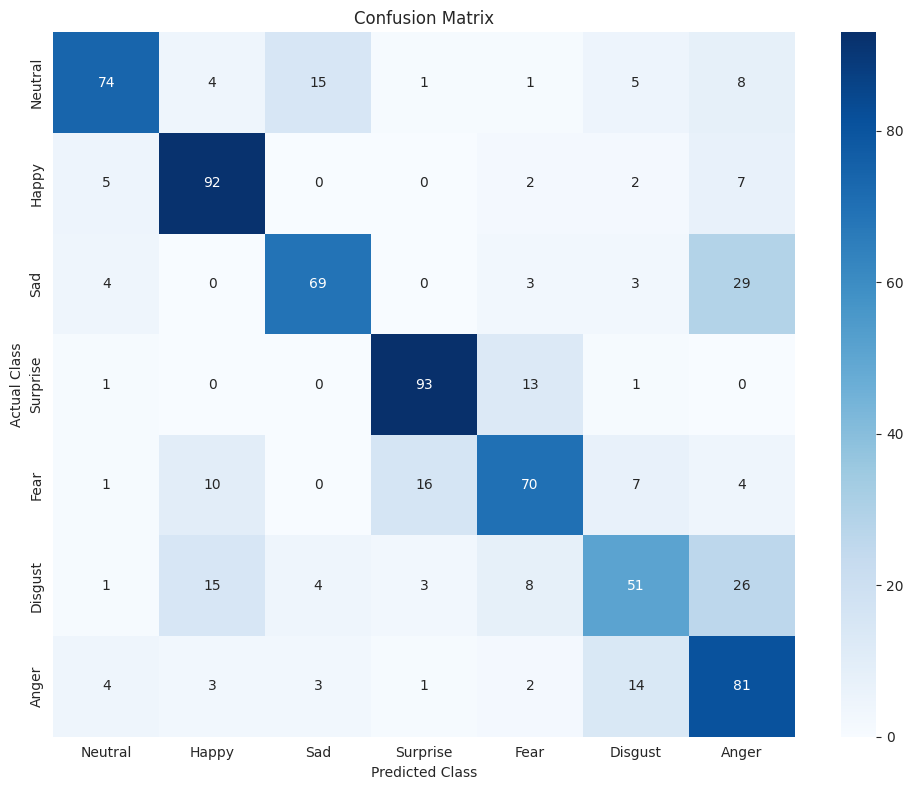

In [27]:
emojihero_cm_figure = plot_confusion_matrix(emojihero_y_true, emojihero_y_pred)

In [28]:
save_evaluation_results(emojihero_report, emojihero_cm_figure, checkpoint_dir, 'emojihero')

In [29]:
import shutil

path_to_this_notebook = Path(
    '/home/thor/Desktop/repos/emoji-hero-baseline/affectnet_occluded_and_emojihero_transfer_imagenet.ipynb')

shutil.copy2(path_to_this_notebook, (checkpoint_dir / path_to_this_notebook.name))

PosixPath('affectnet_occluded_and_emojihero_transfer_imagenet_checkpoints_20240321-0919/affectnet_occluded_and_emojihero_transfer_imagenet.ipynb')